In [1]:
import numpy as np
import matplotlib.pyplot as plt

EXAMPLE 1: Well-behaved function f(x) = x³ - 2x - 5

Initial guess: x₀ = 2.0
Estimated root: x = 2.0945514815
Number of iterations: 4
Final error: 1.56e-10
f(root) = -8.88e-16


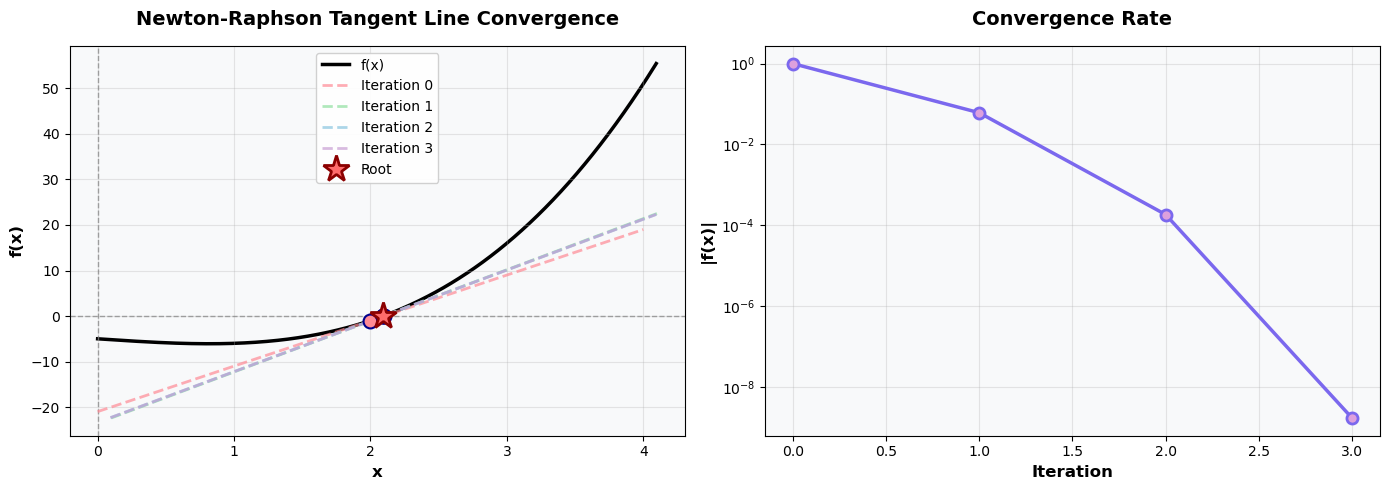


EXAMPLE 2: Problematic case - f(x) = x² - 1 with poor initial guess

Initial guess: x₀ = 0.1
Estimated root: x = 1.0000000000
Number of iterations: 8
Final error: 1.40e-11
f(root) = 0.00e+00


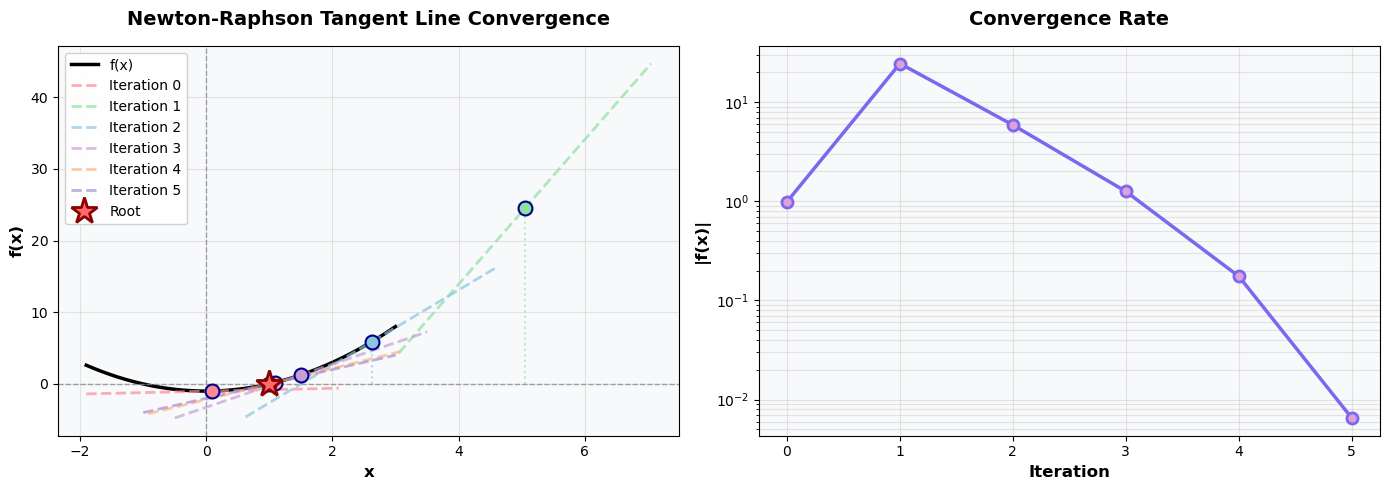


EXAMPLE 3: Derivative near zero - f(x) = x³
df(x) = 6.10454656157622e-11, convergence may fail

NON-CONVERGENCE ISSUES IN NEWTON-RAPHSON METHOD

1. DERIVATIVE NEAR ZERO:
   - When f'(x) ≈ 0, the tangent line becomes nearly horizontal
   - Next iteration: x_{n+1} = x_n - f(x_n)/f'(x_n) → ±∞
   - Solution: Use hybrid methods or better initial guess

2. POOR INITIAL GUESS:
   - May converge to wrong root or diverge
   - May oscillate between points
   - Solution: Use bracketing methods first

3. LOCAL EXTREMA:
   - At local max/min, f'(x) = 0 causes division by zero
   - Algorithm fails catastrophically
   - Solution: Check derivative before division

4. CYCLIC BEHAVIOR:
   - Some functions cause iterations to cycle
   - Never converges to a single value
   - Solution: Detect cycles and modify approach

5. COMPLEX ROOTS:
   - Real initial guess may not find complex roots
   - Solution: Use complex arithmetic or different method

6. MULTIPLE ROOTS:
   - Linear convergence instead of quadr

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    """
    Newton-Raphson method for finding roots of a function.
    
    Parameters:
    -----------
    f : function
        The function for which we want to find the root
    df : function
        The derivative of the function
    x0 : float
        Initial guess
    tol : float
        Tolerance for convergence
    max_iter : int
        Maximum number of iterations
    
    Returns:
    --------
    root : float
        Estimated root
    iterations : int
        Number of iterations performed
    final_error : float
        Final error estimate
    history : list
        List of (x, y, tangent_points) for visualization
    """
    x = x0
    history = []
    
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        
        # Store for visualization
        if i < 6:  # Store first 6 iterations for plotting
            # Calculate tangent line points
            x_tang = np.array([x - 2, x + 2])
            y_tang = fx + dfx * (x_tang - x)
            history.append((x, fx, x_tang, y_tang))
        
        # Check for zero derivative
        if abs(dfx) < 1e-10:
            print(f"Warning: Derivative near zero at iteration {i}")
            print(f"df(x) = {dfx}, convergence may fail")
            return None, i, None, history
        
        # Newton-Raphson update
        x_new = x - fx / dfx
        error = abs(x_new - x)
        
        # Check convergence
        if error < tol:
            return x_new, i + 1, error, history
        
        x = x_new
    
    print(f"Warning: Maximum iterations ({max_iter}) reached without convergence")
    return x, max_iter, error, history


def plot_convergence(f, df, x0, root, history):
    """
    Plot the Newton-Raphson convergence process with tangent lines.
    
    Parameters:
    -----------
    f : function
        The function
    df : function
        The derivative
    x0 : float
        Initial guess
    root : float
        Final root estimate
    history : list
        History of iterations
    """
    # Create figure with pastel colors
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Darker pastel color palette
    colors = ['#FF8A95', '#90E0A0', '#8AC6E0', '#C89FD4', '#FFB380', '#A68FD4']
    
    # Plot 1: Function and tangent lines
    x_range = np.linspace(min(x0, root) - 2, max(x0, root) + 2, 500)
    y_range = f(x_range)
    
    ax1.plot(x_range, y_range, 'k-', linewidth=2.5, label='f(x)', zorder=1)
    ax1.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.7)
    ax1.axvline(x=0, color='gray', linestyle='--', linewidth=1, alpha=0.7)
    
    # Plot tangent lines and iterations
    for idx, (x, fx, x_tang, y_tang) in enumerate(history):
        color = colors[idx % len(colors)]
        
        # Plot tangent line
        ax1.plot(x_tang, y_tang, '--', color=color, linewidth=2, 
                alpha=0.7, label=f'Iteration {idx}', zorder=2)
        
        # Plot point on curve
        ax1.plot(x, fx, 'o', color=color, markersize=10, 
                markeredgecolor='darkblue', markeredgewidth=1.5, zorder=3)
        
        # Draw vertical line to x-axis
        ax1.plot([x, x], [0, fx], ':', color=color, linewidth=1.5, alpha=0.6, zorder=2)
    
    # Mark the root
    if root is not None:
        ax1.plot(root, f(root), '*', color='#FF6B6B', markersize=20, 
                markeredgecolor='darkred', markeredgewidth=2, 
                label='Root', zorder=4)
    
    ax1.set_xlabel('x', fontsize=12, fontweight='bold')
    ax1.set_ylabel('f(x)', fontsize=12, fontweight='bold')
    ax1.set_title('Newton-Raphson Tangent Line Convergence', 
                  fontsize=14, fontweight='bold', pad=15)
    ax1.legend(loc='best', framealpha=0.9)
    ax1.grid(True, alpha=0.3)
    ax1.set_facecolor('#F8F9FA')
    
    # Plot 2: Convergence history
    if len(history) > 0:
        iterations = range(len(history))
        x_values = [h[0] for h in history]
        y_values = [abs(h[1]) for h in history]
        
        ax2.semilogy(iterations, y_values, 'o-', color='#7B68EE', 
                    linewidth=2.5, markersize=8, markerfacecolor='#DDA0DD',
                    markeredgecolor='#7B68EE', markeredgewidth=2)
        
        ax2.set_xlabel('Iteration', fontsize=12, fontweight='bold')
        ax2.set_ylabel('|f(x)|', fontsize=12, fontweight='bold')
        ax2.set_title('Convergence Rate', fontsize=14, fontweight='bold', pad=15)
        ax2.grid(True, alpha=0.3, which='both')
        ax2.set_facecolor('#F8F9FA')
    
    plt.tight_layout()
    plt.show()


# Example 1: Well-behaved function
print("="*70)
print("EXAMPLE 1: Well-behaved function f(x) = x³ - 2x - 5")
print("="*70)

def f1(x):
    return x**3 - 2*x - 5

def df1(x):
    return 3*x**2 - 2

x0_1 = 2.0
root1, iters1, error1, history1 = newton_raphson(f1, df1, x0_1, tol=1e-6)

print(f"\nInitial guess: x₀ = {x0_1}")
print(f"Estimated root: x = {root1:.10f}")
print(f"Number of iterations: {iters1}")
print(f"Final error: {error1:.2e}")
print(f"f(root) = {f1(root1):.2e}")

plot_convergence(f1, df1, x0_1, root1, history1)

# Example 2: Function demonstrating convergence issues
print("\n" + "="*70)
print("EXAMPLE 2: Problematic case - f(x) = x² - 1 with poor initial guess")
print("="*70)

def f2(x):
    return x**2 - 1

def df2(x):
    return 2*x

x0_2 = 0.1  # Poor initial guess near zero derivative
root2, iters2, error2, history2 = newton_raphson(f2, df2, x0_2, tol=1e-6)

if root2 is not None:
    print(f"\nInitial guess: x₀ = {x0_2}")
    print(f"Estimated root: x = {root2:.10f}")
    print(f"Number of iterations: {iters2}")
    print(f"Final error: {error2:.2e}")
    print(f"f(root) = {f2(root2):.2e}")
    
    plot_convergence(f2, df2, x0_2, root2, history2)

# Example 3: Derivative near zero issue
print("\n" + "="*70)
print("EXAMPLE 3: Derivative near zero - f(x) = x³")
print("="*70)

def f3(x):
    return x**3

def df3(x):
    return 3*x**2

x0_3 = 0.01  # Very close to inflection point
root3, iters3, error3, history3 = newton_raphson(f3, df3, x0_3, tol=1e-6, max_iter=50)

if root3 is not None:
    print(f"\nInitial guess: x₀ = {x0_3}")
    print(f"Estimated root: x = {root3:.10f}")
    print(f"Number of iterations: {iters3}")
    print(f"Final error: {error3:.2e}")

# Discussion of non-convergence issues
print("\n" + "="*70)
print("NON-CONVERGENCE ISSUES IN NEWTON-RAPHSON METHOD")
print("="*70)
print("""
1. DERIVATIVE NEAR ZERO:
   - When f'(x) ≈ 0, the tangent line becomes nearly horizontal
   - Next iteration: x_{n+1} = x_n - f(x_n)/f'(x_n) → ±∞
   - Solution: Use hybrid methods or better initial guess

2. POOR INITIAL GUESS:
   - May converge to wrong root or diverge
   - May oscillate between points
   - Solution: Use bracketing methods first

3. LOCAL EXTREMA:
   - At local max/min, f'(x) = 0 causes division by zero
   - Algorithm fails catastrophically
   - Solution: Check derivative before division

4. CYCLIC BEHAVIOR:
   - Some functions cause iterations to cycle
   - Never converges to a single value
   - Solution: Detect cycles and modify approach

5. COMPLEX ROOTS:
   - Real initial guess may not find complex roots
   - Solution: Use complex arithmetic or different method

6. MULTIPLE ROOTS:
   - Linear convergence instead of quadratic at multiple roots
   - Slower convergence but usually still works
   - Solution: Use modified Newton-Raphson for multiple roots
""")